<a href="https://colab.research.google.com/github/danielsineus/Financial-Analysis/blob/master/portfoliooptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Optimization
I have considered a list of securities to be my investment universe. Before investing, it is important to construct the portfolio. We will start by the security selection. We make the attempt to identify the risk-return combinations available from the given assets. We also determine the optimal portfolio by also finding the portfolio weights in the steepest CAL. We will at last choose an appropriate complete profolio by mixing the risk free asset with the optimal risky portfolio.

In [13]:
import pandas as pd
from pandas import Series, DataFrame


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [6]:
!pip install PyPortfolioOpt # install the package for portfolio management


     |████████████████████████████████| 61 kB 2.9 MB/s 
     |████████████████████████████████| 2.7 MB 8.4 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [1]:
!pip install yfinance

In [2]:
from pypfopt.efficient_frontier import EfficientFrontier


In [8]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from matplotlib.ticker import FuncFormatter

In [9]:
from pypfopt import expected_returns
from pypfopt.cla import CLA

from matplotlib.ticker import FuncFormatter

#Scrapping Data from Yahoo Finance


In [3]:

from google.colab import files


In [11]:
uploaded=files.upload()

Saving timeseriesportfolio.csv to timeseriesportfolio (1).csv


In [15]:
da=pd.read_csv("timeseriesportfolio.csv", parse_dates=True,index_col="DATE")
da.head()

,WFC,VTI,URI,UNH,TOYOF,NEE,LOW,HD,GME,FPL,FANG,F,COST,CCBG,AAPL,T-Bill
DATE,,,,,,,,,,,,,,,,
2021-10-22,50.66,234.36,368.29,449.16,17.430,84.42,228.77,365.99,169.80,5.93,109.33,16.28,481.99,26.84,148.69,NaN
2021-10-21,50.33,234.81,365.40,442.28,17.800,83.81,227.42,364.62,181.71,5.95,108.93,16.55,477.23,26.79,149.48,0.0006
2021-10-20,50.16,234.17,365.92,435.09,17.890,83.92,225.01,358.23,184.52,5.98,111.15,16.04,469.77,26.78,149.26,0.0005
2021-10-19,50.34,233.26,353.44,424.38,17.925,82.03,222.91,357.99,186.79,5.97,110.94,15.42,467.08,26.49,148.76,0.0005
2021-10-18,49.43,231.57,350.27,424.62,17.850,80.99,221.74,355.01,186.02,5.97,109.26,15.56,461.95,26.33,146.55,0.0004


In [16]:
da1=pd.DataFrame(da)
da1.head()


,WFC,VTI,URI,UNH,TOYOF,NEE,LOW,HD,GME,FPL,FANG,F,COST,CCBG,AAPL,T-Bill
DATE,,,,,,,,,,,,,,,,
2021-10-22,50.66,234.36,368.29,449.16,17.430,84.42,228.77,365.99,169.80,5.93,109.33,16.28,481.99,26.84,148.69,NaN
2021-10-21,50.33,234.81,365.40,442.28,17.800,83.81,227.42,364.62,181.71,5.95,108.93,16.55,477.23,26.79,149.48,0.0006
2021-10-20,50.16,234.17,365.92,435.09,17.890,83.92,225.01,358.23,184.52,5.98,111.15,16.04,469.77,26.78,149.26,0.0005
2021-10-19,50.34,233.26,353.44,424.38,17.925,82.03,222.91,357.99,186.79,5.97,110.94,15.42,467.08,26.49,148.76,0.0005
2021-10-18,49.43,231.57,350.27,424.62,17.850,80.99,221.74,355.01,186.02,5.97,109.26,15.56,461.95,26.33,146.55,0.0004


In [17]:
del da1["T-Bill"]

In [18]:
da1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1213 entries, 2021-10-22 to 2017-01-03
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WFC     1211 non-null   float64
 1   VTI     1211 non-null   float64
 2   URI     1211 non-null   float64
 3   UNH     1211 non-null   float64
 4   TOYOF   1211 non-null   float64
 5   NEE     1211 non-null   float64
 6   LOW     1211 non-null   float64
 7   HD      1211 non-null   float64
 8   GME     1211 non-null   float64
 9   FPL     1211 non-null   float64
 10  FANG    1211 non-null   float64
 11  F       1211 non-null   float64
 12  COST    1212 non-null   float64
 13  CCBG    1211 non-null   float64
 14  AAPL    1212 non-null   float64
dtypes: float64(15)
memory usage: 151.6 KB


In [19]:
print(da1.isnull().sum())

WFC      2
VTI      2
URI      2
UNH      2
TOYOF    2
NEE      2
LOW      2
HD       2
GME      2
FPL      2
FANG     2
F        2
COST     1
CCBG     2
AAPL     1
dtype: int64


In [20]:
da1.aggregate([min, max, np.median, np.mean, np.std]).round(2)

,WFC,VTI,URI,UNH,TOYOF,NEE,LOW,HD,GME,FPL,FANG,F,COST,CCBG,AAPL
min,21.14,111.91,69.59,157.62,10.37,29.59,65.02,133.53,2.80,3.00,15.56,4.01,150.44,16.71,29.00
max,65.93,234.81,368.29,449.16,19.60,86.87,228.77,365.99,347.51,13.94,139.92,16.55,481.99,30.66,156.69
median,49.17,147.17,149.32,256.05,12.82,49.90,105.03,203.70,14.88,9.03,96.05,10.24,248.44,23.98,52.29
mean,46.48,156.99,171.91,270.49,13.23,53.78,119.02,218.77,38.66,8.63,89.07,10.18,267.81,23.61,71.22
std,10.88,31.49,72.05,69.16,1.86,16.13,40.25,55.63,63.26,3.14,29.10,2.33,84.45,2.78,37.35


#Graphs of the securities part of the investment universe
It helps see the trends of each securities and also the variation of the stocks through a given period of time. The graph of cumulative returns will be presented in order to observe the stocks's return

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c522aad10>,
      dtype=object)

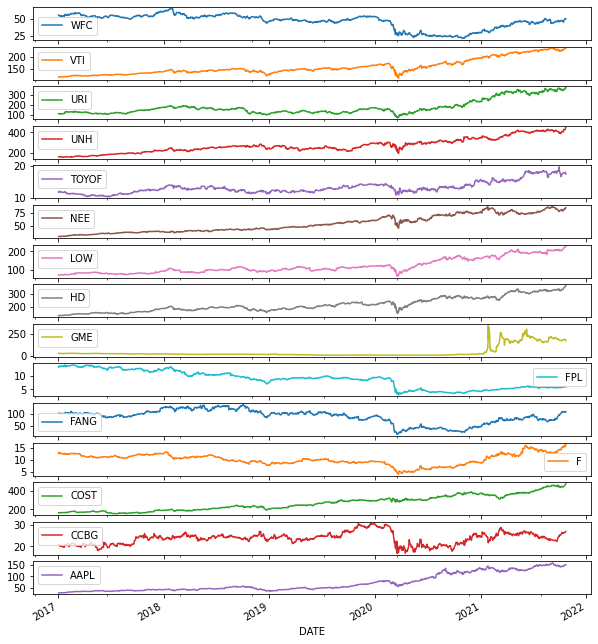

In [21]:
da1.plot(figsize=(10,12), subplots=True)


## Annualized return and Sample Variance of Portfolio



```
# Calculation
```



In [38]:
# Changes over time/ return over time
da1.pct_change().head()

,WFC,VTI,URI,UNH,TOYOF,NEE,LOW,HD,GME,FPL,FANG,F,COST,CCBG,AAPL
DATE,,,,,,,,,,,,,,,
2021-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,-0.006514,0.001920,-0.007847,-0.015317,0.021228,-0.007226,-0.005901,-0.003743,0.070141,0.003373,-0.003659,0.016585,-0.009876,-0.001863,0.005313
2021-10-20,-0.003378,-0.002726,0.001423,-0.016257,0.005056,0.001312,-0.010597,-0.017525,0.015464,0.005042,0.020380,-0.030816,-0.015632,-0.000373,-0.001472
2021-10-19,0.003589,-0.003886,-0.034106,-0.024616,0.001956,-0.022521,-0.009333,-0.000670,0.012302,-0.001672,-0.001889,-0.038653,-0.005726,-0.010829,-0.003350
2021-10-18,-0.018077,-0.007245,-0.008969,0.000566,-0.004184,-0.012678,-0.005249,-0.008324,-0.004122,0.000000,-0.015143,0.009079,-0.010983,-0.006040,-0.014856


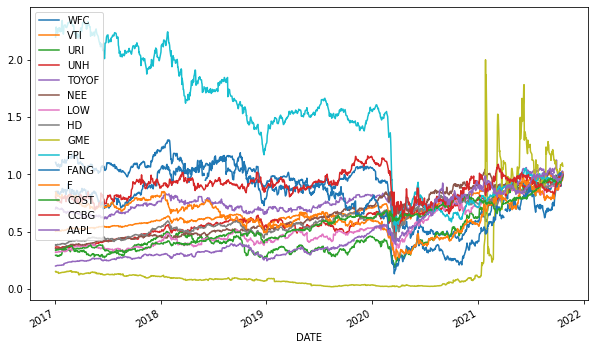

In [35]:
datlog=np.log(da1/da1.shift(1))
datlog.head()
datlog.cumsum().apply(np.exp).plot(figsize=(10,6))

In [39]:
mu=expected_returns.mean_historical_return(da1)
pd.DataFrame(mu)

,0
WFC,0.021055
VTI,-0.135726
URI,-0.223189
UNH,-0.191635
TOYOF,-0.077549
NEE,-0.195349
LOW,-0.216059
HD,-0.188143
GME,-0.326501
FPL,0.178215


In [37]:
cov=risk_models.sample_cov(da1).round(3)
cov

,WFC,VTI,URI,UNH,TOYOF,NEE,LOW,HD,GME,FPL,FANG,F,COST,CCBG,AAPL
WFC,0.126,0.049,0.093,0.048,0.021,0.032,0.055,0.049,0.050,0.072,0.112,0.073,0.023,0.091,0.041
VTI,0.049,0.039,0.062,0.039,0.013,0.027,0.046,0.040,0.030,0.047,0.065,0.042,0.024,0.045,0.046
URI,0.093,0.062,0.205,0.059,0.024,0.029,0.080,0.065,0.061,0.091,0.162,0.090,0.027,0.105,0.064
UNH,0.048,0.039,0.059,0.084,0.014,0.031,0.051,0.045,0.017,0.047,0.052,0.040,0.026,0.046,0.044
TOYOF,0.021,0.013,0.024,0.014,0.062,0.006,0.012,0.013,0.017,0.020,0.028,0.021,0.006,0.018,0.013
NEE,0.032,0.027,0.029,0.031,0.006,0.058,0.033,0.032,-0.007,0.036,0.020,0.024,0.019,0.031,0.029
LOW,0.055,0.046,0.080,0.051,0.012,0.033,0.115,0.074,0.034,0.056,0.080,0.053,0.030,0.056,0.051
HD,0.049,0.040,0.065,0.045,0.013,0.032,0.074,0.072,0.028,0.044,0.061,0.043,0.030,0.051,0.046
GME,0.050,0.030,0.061,0.017,0.017,-0.007,0.034,0.028,1.782,0.054,0.066,0.070,0.013,0.038,0.048
FPL,0.072,0.047,0.091,0.047,0.020,0.036,0.056,0.044,0.054,0.152,0.151,0.067,0.020,0.065,0.046


#Determine constraints and objectives - Sharpe Ratio and Efficient Frontier
Investment decision based on the constrainsts.Minimum/maximum position size: In my case I do not want security to form more than 40
% of my portfolio. 

In [44]:
##Obtain the efficient frontier## 
efficientfront=EfficientFrontier(mu,cov)
efficientfront.max_sharpe()
cleaweights=efficientfront.clean_weights()
print(cleaweights)

OrderedDict([('WFC', 0.0), ('VTI', 0.0), ('URI', 0.0), ('UNH', 0.0), ('TOYOF', 0.0), ('NEE', 0.0), ('LOW', 0.0), ('HD', 0.0), ('GME', 0.0), ('FPL', 1.0), ('FANG', 0.0), ('F', 0.0), ('COST', 0.0), ('CCBG', 0.0), ('AAPL', 0.0)])


In [43]:
ef=EfficientFrontier(mu, cov, weight_bounds=(0,0.35))
ef.max_sharpe()


OrderedDict([('WFC', 0.35),
             ('VTI', 0.0),
             ('URI', 0.0),
             ('UNH', 0.0),
             ('TOYOF', 0.0),
             ('NEE', 0.0),
             ('LOW', 0.0),
             ('HD', 0.0),
             ('GME', 0.0),
             ('FPL', 0.35),
             ('FANG', 0.2251276032126175),
             ('F', 0.0748723967873825),
             ('COST', 0.0),
             ('CCBG', 0.0),
             ('AAPL', 0.0)])

In [40]:
et=EfficientFrontier(mu, cov, weight_bounds=(-1,1))


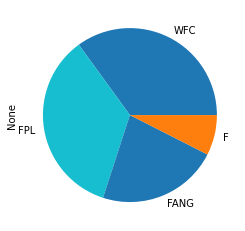

In [45]:
weights=ef.clean_weights()
pd.Series(weights).plot.pie()


# GETTING DATA FROM WEB
Get data from yahoo Finance


In [148]:
# import yfinance package to get tickers



In [149]:
import yfinance as yf



In [150]:
symbol=["BNDX", "EFA", "EMB", "MDY", "TLT","WFC", "GME", "AAPL","CCBG", "HD", "FPL", "WMT", "DIS"]
startperiod="2016-01-04"
endperiod="2021-11-04"


In [151]:
tickerData=yf.download(symbol, startperiod, endperiod)["Adj Close"]
tickerData.head()

[*********************100%***********************]  13 of 13 completed


,AAPL,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,MDY,TLT,WFC,WMT
Date,,,,,,,,,,,,,
2016-01-04,24.220581,45.461811,13.542318,97.155785,48.449772,80.069695,5.951169,21.848799,114.283218,232.664307,106.618385,43.965508,53.968376
2016-01-05,23.613623,45.436054,13.821818,95.193420,48.374348,80.281830,5.956550,22.203815,113.725174,232.738541,106.188210,43.948898,55.250404
2016-01-06,23.151514,45.607643,13.939029,94.683952,47.578312,80.274246,5.660605,21.895109,112.548111,229.454758,107.619141,43.109634,55.803619
2016-01-07,22.174414,45.539009,13.722638,93.872597,46.589535,79.895409,5.407707,21.956852,109.339409,223.592224,107.812256,41.879826,57.103230
2016-01-08,22.291666,45.530426,13.497235,93.636742,46.028118,79.827225,5.563749,21.895109,108.031532,220.605347,108.295128,41.181835,55.794838


In [152]:
print(tickerData.isnull().sum())

AAPL    0
BNDX    0
CCBG    0
DIS     0
EFA     0
EMB     0
FPL     0
GME     0
HD      0
MDY     0
TLT     0
WFC     0
WMT     0
dtype: int64


AxesSubplot(0.125,0.2;0.775x0.68)


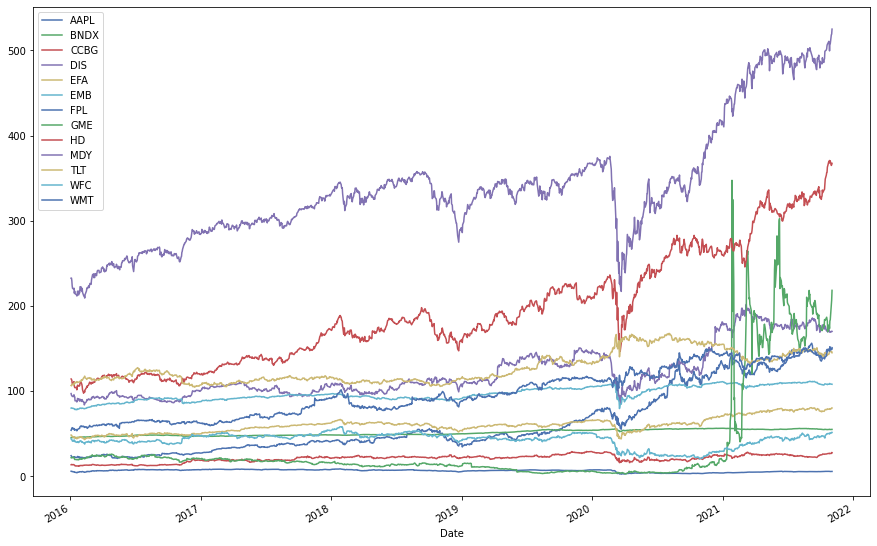

In [153]:

print(tickerData.plot(figsize=(15,10)))

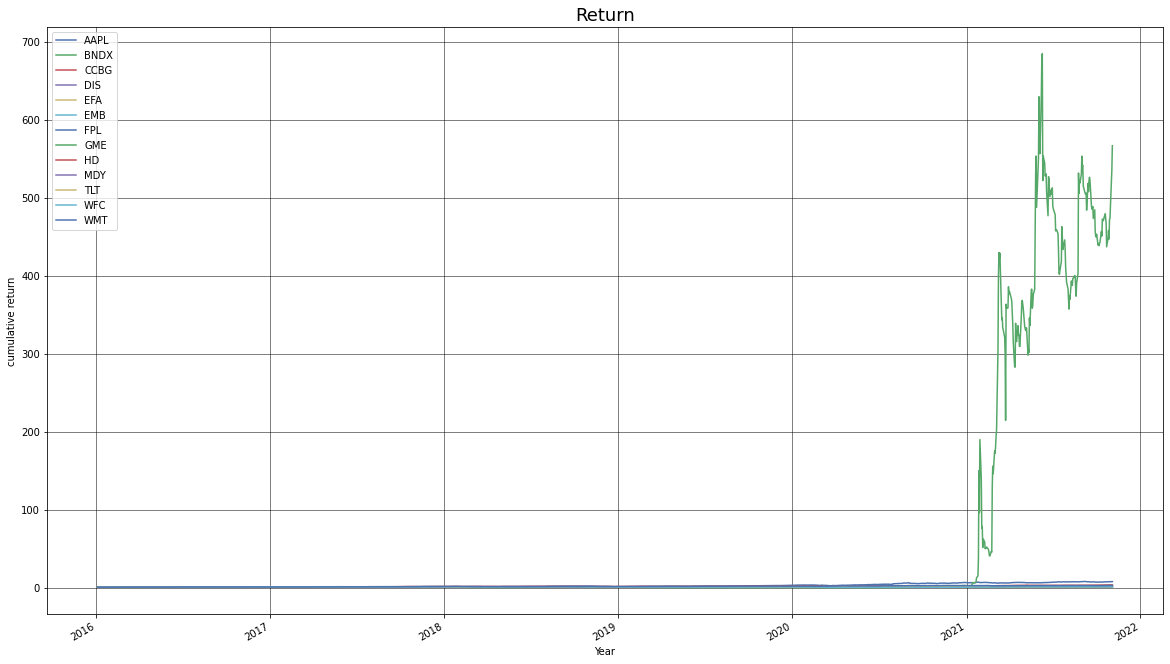

In [156]:
# daily return
ret=tickerData.pct_change()
ret.cumsum().apply(np.exp).plot(figsize=(20,12))
plt.legend()
plt.title("Return", fontsize=18)
plt.ylabel("cumulative return")
plt.xlabel("Year")
plt.grid(which="major", color="k", linestyle="-", linewidth=0.5)

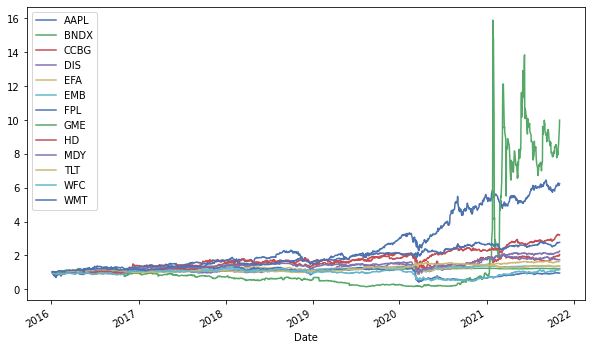

In [157]:
ret1=np.log(tickerData/tickerData.shift(1))
ret1.head()
ret1.cumsum().apply(np.exp).plot(figsize=(10,6))

# Use PyPortfolioOpt package for portfolio Optimization in **Finance**

In [158]:
#Expected Return and covariance
mu1=expected_returns.mean_historical_return(tickerData)
sigma=risk_models.sample_cov(tickerData).round(3)
sigma

,AAPL,BNDX,CCBG,DIS,EFA,EMB,FPL,GME,HD,MDY,TLT,WFC,WMT
AAPL,0.087,0.001,0.029,0.033,0.031,0.011,0.041,0.040,0.038,0.038,-0.010,0.035,0.022
BNDX,0.001,0.001,-0.000,0.000,0.000,0.001,0.001,-0.001,0.001,0.000,0.002,-0.001,0.000
CCBG,0.029,-0.000,0.143,0.045,0.036,0.012,0.050,0.033,0.041,0.055,-0.018,0.079,0.016
DIS,0.033,0.000,0.045,0.075,0.029,0.011,0.049,0.026,0.033,0.039,-0.010,0.047,0.015
EFA,0.031,0.000,0.036,0.029,0.031,0.011,0.039,0.024,0.029,0.033,-0.009,0.039,0.014
EMB,0.011,0.001,0.012,0.011,0.011,0.009,0.020,0.008,0.011,0.012,0.002,0.011,0.003
FPL,0.041,0.001,0.050,0.049,0.039,0.020,0.142,0.057,0.036,0.051,-0.009,0.060,0.014
GME,0.040,-0.001,0.033,0.026,0.024,0.008,0.057,1.646,0.023,0.043,-0.016,0.050,0.007
HD,0.038,0.001,0.041,0.033,0.029,0.011,0.036,0.023,0.061,0.038,-0.008,0.042,0.022
MDY,0.038,0.000,0.055,0.039,0.033,0.012,0.051,0.043,0.038,0.047,-0.011,0.054,0.017


In [159]:
efffrontier=EfficientFrontier(mu1,sigma)
weight=efffrontier.max_sharpe()
print(weight)

OrderedDict([('AAPL', 0.3027258260596824), ('BNDX', 0.0), ('CCBG', 0.0138483125007156), ('DIS', 0.0), ('EFA', 0.0), ('EMB', 0.0), ('FPL', 0.0), ('GME', 0.018826911864899), ('HD', 0.0684348697833227), ('MDY', 0.0), ('TLT', 0.4178878096197578), ('WFC', 0.0), ('WMT', 0.1782762701716228)])


It is important to clean the weights in order to get a good lok result

In [180]:
clean=efffrontier.clean_weights()
efffrontier.save_weights_to_file("weights.txt")
print(clean)


OrderedDict([('AAPL', 0.30273), ('BNDX', 0.0), ('CCBG', 0.01385), ('DIS', 0.0), ('EFA', 0.0), ('EMB', 0.0), ('FPL', 0.0), ('GME', 0.01883), ('HD', 0.06843), ('MDY', 0.0), ('TLT', 0.41789), ('WFC', 0.0), ('WMT', 0.17828)])


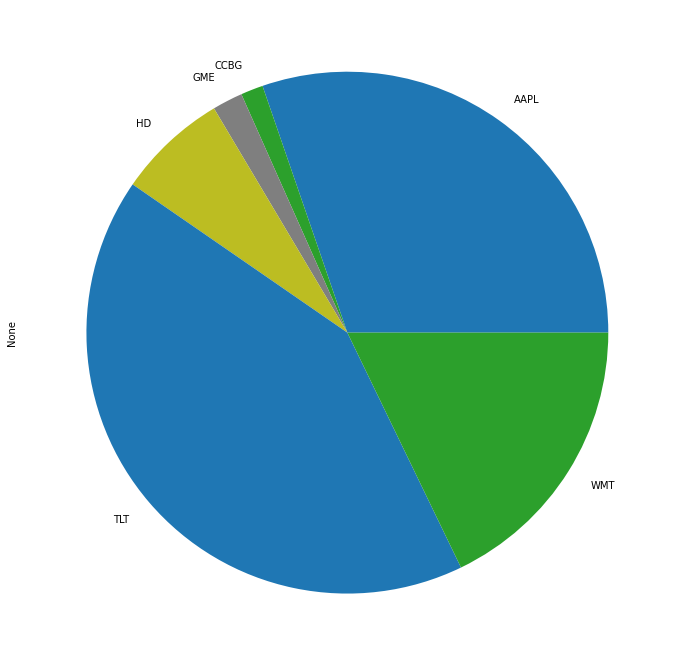

In [68]:
pd.Series(clean).plot.pie(figsize=(18,12))

##Portfolio performance with optimal weights

In [198]:
efffrontier.portfolio_performance(verbose=True)

Expected annual return: 19.4%
Annual volatility: 12.2%
Sharpe Ratio: 1.43


(0.19436602177529314, 0.12215516195205657, 1.4274142736901145)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c41a32450>,
      dtype=object)

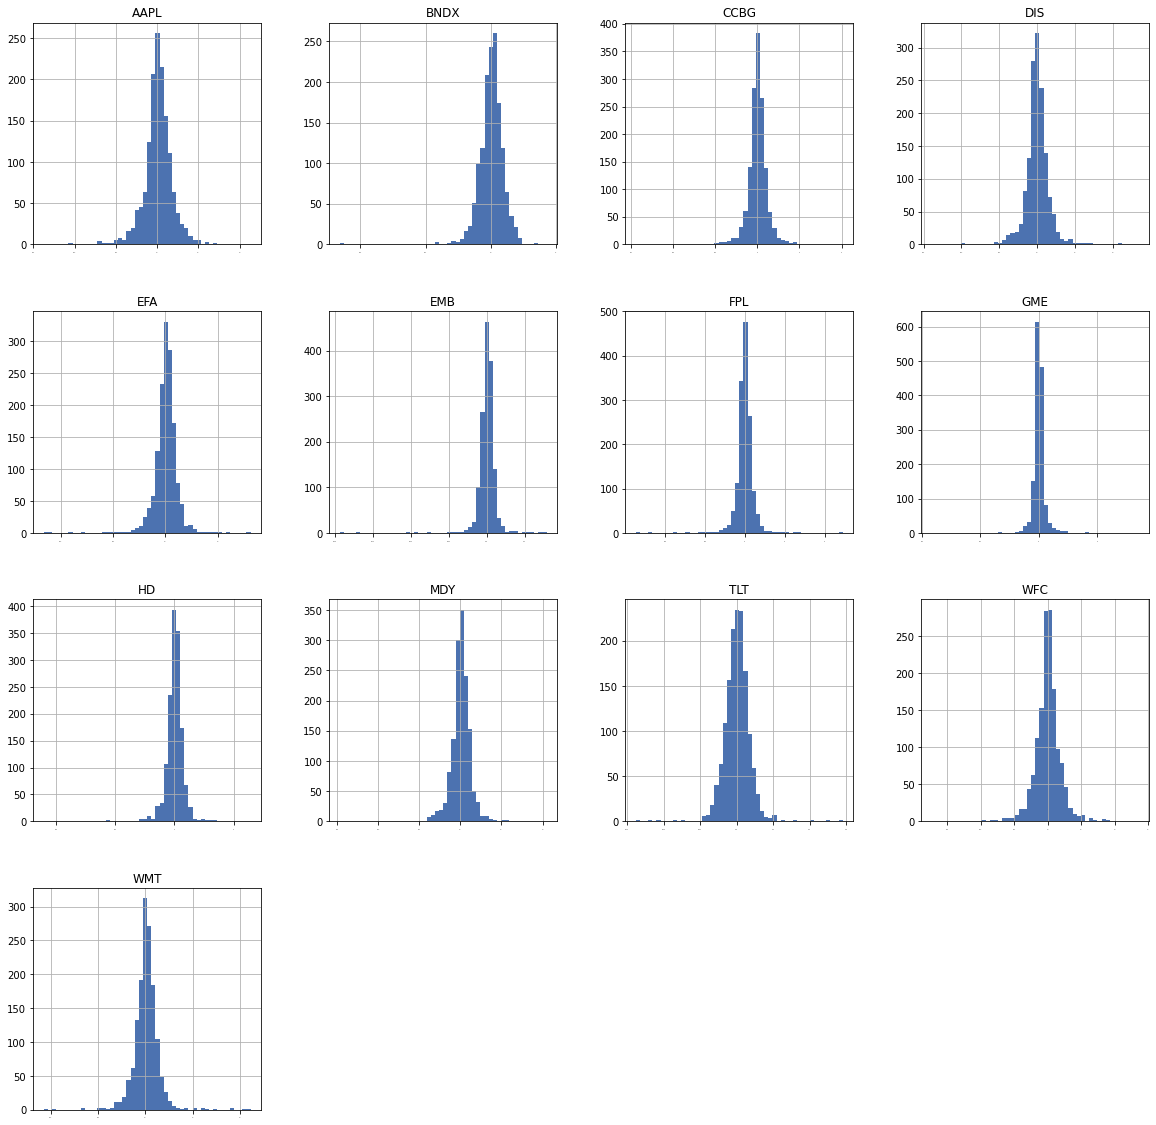

In [199]:
ret1.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, figsize=(20,20))

In [200]:
import seaborn as sns

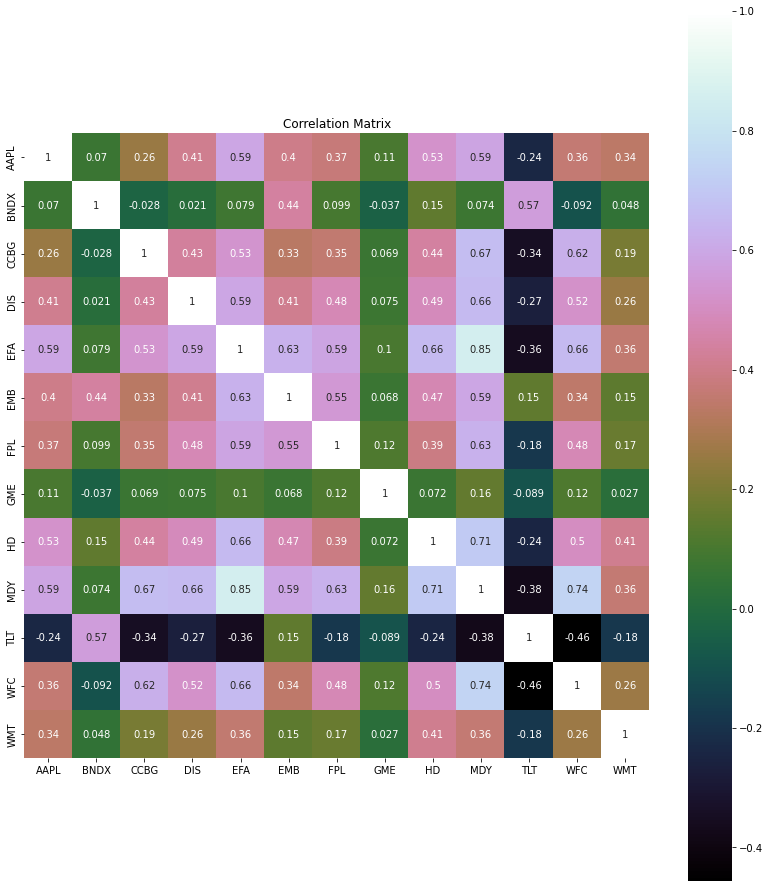

In [201]:
correlation=ret.corr()
plt.figure(figsize=(14,16))
plt.title("Correlation Matrix")
sns.heatmap(correlation,vmax=1, square=True, annot=True, cmap="cubehelix")

Let's ask this question, if I would like to invest $ 70, 754.00, how many quantities of share will i be able to buy. We are going to allocate funds in this optimal portfolio given the weights

In [353]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
lates_pr=get_latest_prices(tickerData)
lates_pr

AAPL    151.076767
BNDX     55.080952
CCBG     27.798615
DIS     170.080002
EFA      80.196442
EMB     108.085625
FPL       5.712753
GME     218.330002
HD      367.450317
MDY     525.038391
TLT     145.027695
WFC      51.568459
WMT     149.577744
Name: 2021-11-03 00:00:00, dtype: float64

In [354]:
invest=DiscreteAllocation(weight, lates_pr,total_portfolio_value=70754)
allocation, leftover=invest.lp_portfolio()
print(allocation)

{'AAPL': 142, 'CCBG': 36, 'GME': 6, 'HD': 13, 'TLT': 204, 'WMT': 84}


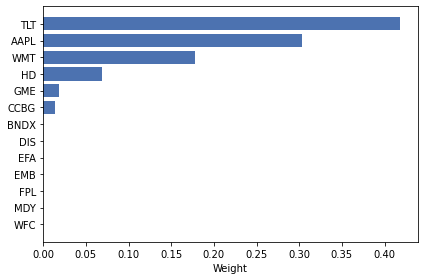

In [355]:
plotting.plot_weights(clean)

A little bit of discussion needs to take place.The function related to EfficientFrontier produces a single optimal portfolio. This means we need all the efficient frontier to be plotted. therefore, we need to establish portfolio considering a range of target risks (a range of standard deviation, a range of target returns (compensation for the risk taken), and a range of risk aversions (utility of the investor). Three functions will come into play: efficient_risk(), efficient_return(), max_quadratic_utility()


In [414]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
ef=EfficientFrontier(mu1, sigma, weight_bounds=(0,1))

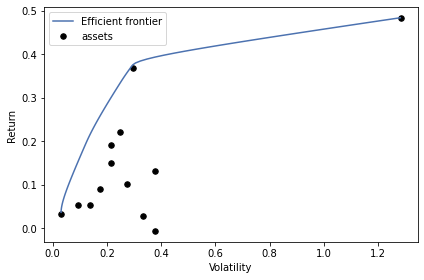

In [403]:
fig, ax=plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)


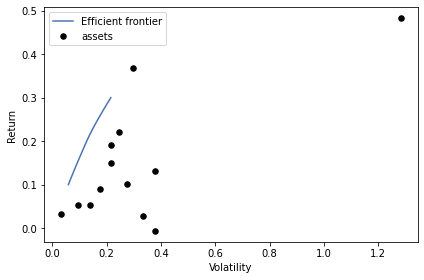

In [404]:
# 100 portfolio with risks between 0.10 and 0.60
risk_range=np.linspace(0.10, 0.30, 100)
plotting.plot_efficient_frontier(ef,ef_param_range=risk_range, show_assets=True)


In [407]:
#Tangency line of the portfolio
ef.max_sharpe()



OrderedDict([('AAPL', 0.3027258260596824),
             ('BNDX', 0.0),
             ('CCBG', 0.0138483125007156),
             ('DIS', 0.0),
             ('EFA', 0.0),
             ('EMB', 0.0),
             ('FPL', 0.0),
             ('GME', 0.018826911864899),
             ('HD', 0.0684348697833227),
             ('MDY', 0.0),
             ('TLT', 0.4178878096197578),
             ('WFC', 0.0),
             ('WMT', 0.1782762701716228)])

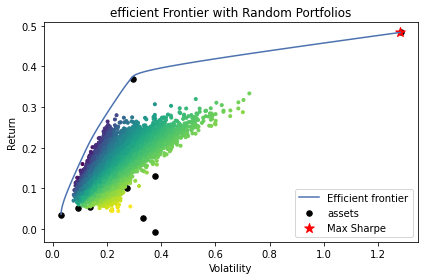

In [417]:
ef=EfficientFrontier(mu1, sigma, weight_bounds=(0,1))
fig, ax=plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
#Tangency line of the portfolio
ret_tangent,std_tangent, _=ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")
n_samples=20000 #generate random portfolios
w=np.random.dirichlet(np.ones(len(mu1)), n_samples)
rets=w.dot(mu1)
stds=np.sqrt(np.diag(w @ sigma @ w.T))
sharpes=rets/stds
ax.scatter(stds,rets, marker=".", c=sharpes, cmap="viridis_r")
#output
ax.set_title("efficient Frontier with Random Portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("efficient.png", dpi=200)
plt.show()
